# Data Exploration and Visualization

Plot statistics related to the different attributes in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

articles = pd.read_excel("data/OpArticles.xlsx")
ADUs = pd.read_excel("data/ADUs_pre-processed.xlsx")

In [6]:
from jupyterthemes import jtplot

jtplot.style(theme='onedork')

## Labels distribution

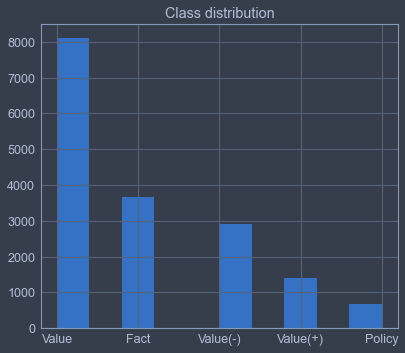

In [15]:
plt.hist(ADUs["label"])
plt.title("Class distribution")
plt.savefig("./statistics/class_distribution.png")

## Annotator

(array([3335.,    0.,    0., 5226.,    0.,    0., 4071.,    0.,    0.,
        4111.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

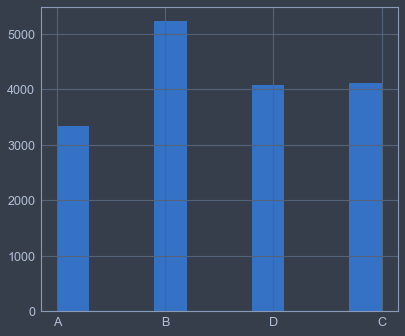

In [35]:
plt.hist(ADUs["annotator"])

## Topics distribution

C:\Users\caion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


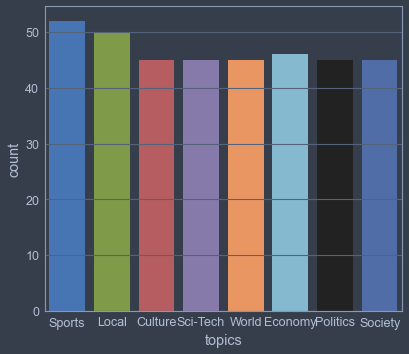

In [4]:
plot = sb.countplot(articles["topics"])
fig = plot.get_figure()
fig.savefig("./statistics/topics.png") 

In [32]:
topics = []

for adu in ADUs.iterrows():
    ID = adu[1]["article_id"]
    topic = articles.loc[articles["article_id"] == ID]["topics"]
    topics.append(topic.values[0])

ADUs["topics"] = topics


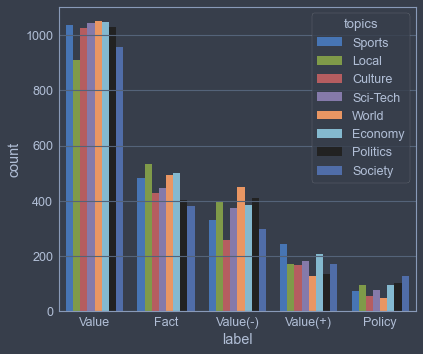

In [18]:
topics_plot = sb.countplot(data=ADUs, x="label", hue="topics")
fig = topics_plot.get_figure()
fig.savefig("./statistics/topics_plot.png") 

## Textual Characterization

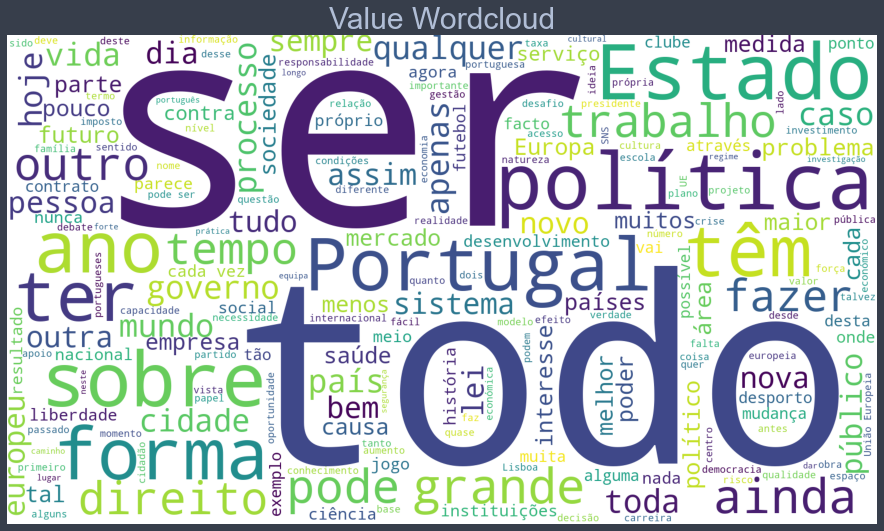

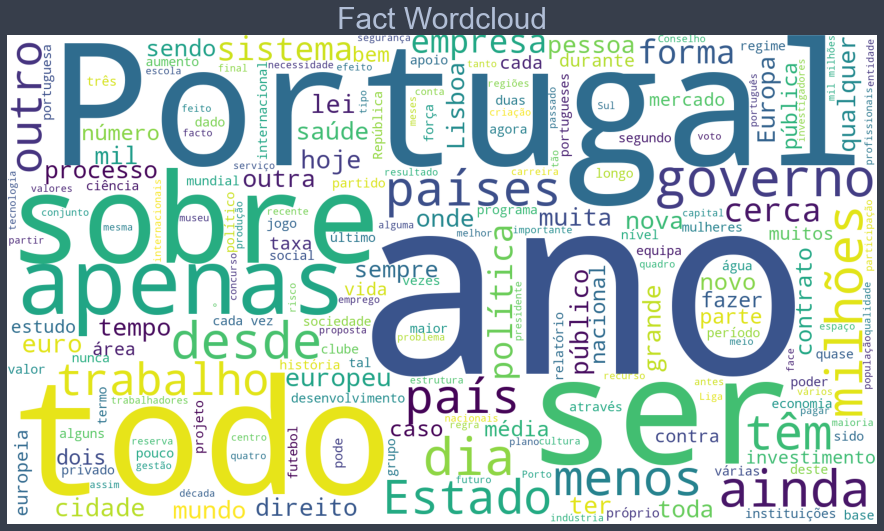

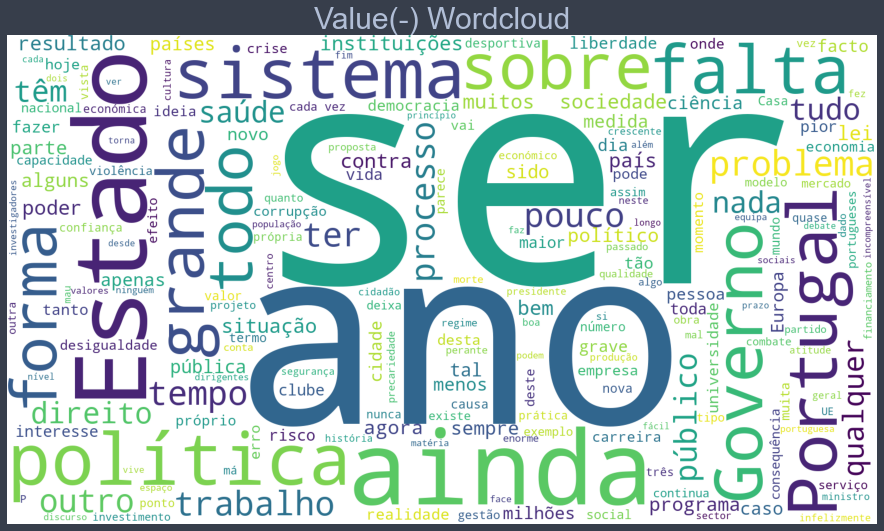

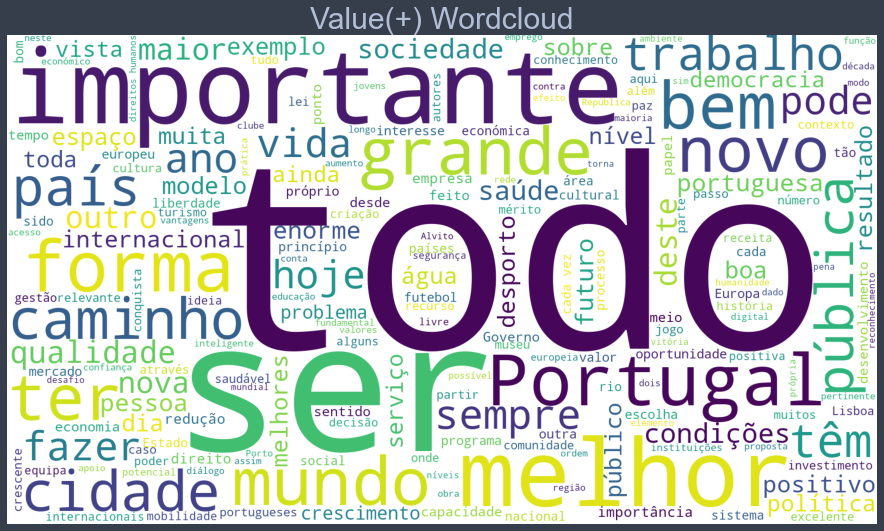

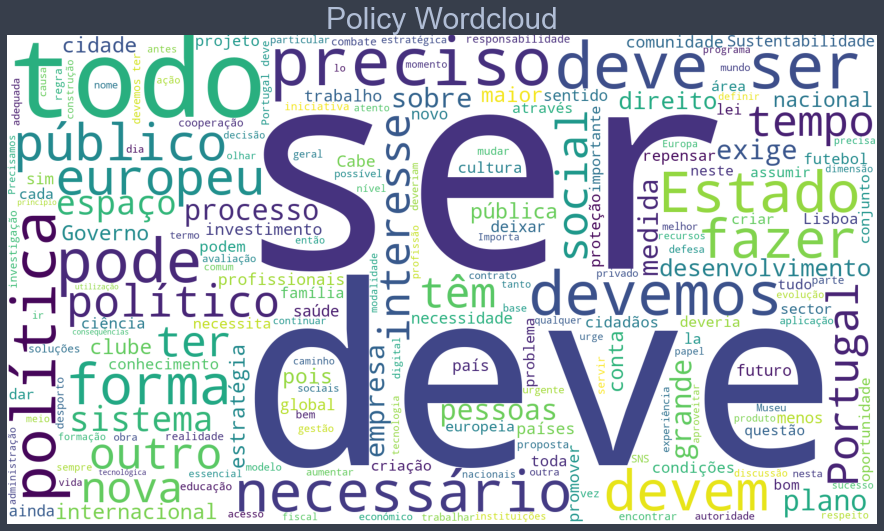

In [45]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = stopwords.words('portuguese')
topics = ADUs["label"].unique()

for topic in topics:
    text = " ".join(ADUs.loc[ADUs["label"] == topic]["tokens"])
    wordcloud = WordCloud(height = 900, width = 1600,
                          background_color="white", stopwords=stopwords).generate(text)
    plt.figure(figsize = (16, 9), facecolor = None)
    plt.imshow(wordcloud)
    plt.title(topic +  " Wordcloud", fontdict={'fontsize': 30})
    plt.axis("off")
    plt.savefig(f"./statistics/{topic}_wordcloud.png")
    plt.show()

## Investigate POS-tags

In [ ]:
pre_processed = pd.read_excel("data/ADUs_pre-processed.xlsx")

Text(0.5, 1.0, 'Average number of adjectives')

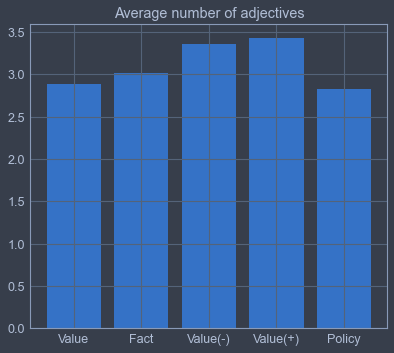

In [16]:
labels = pre_processed["label"].unique()
y = []
for label in labels:
    df = pre_processed.loc[pre_processed["label"] == label]
    y.append(df["ADJ_count"].mean())
plt.bar(labels, y)
plt.title("Average number of adjectives")

## Stemming vs Lemmatization


In [4]:
from nltk.stem import RSLPStemmer
import re
import pt_core_news_sm

nlp = pt_core_news_sm.load()
corpus_lemmatized = []
corpus_stemmed = []

stemmer = RSLPStemmer()
for row in ADUs.iterrows():
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z!?]', ' ',row[1]["tokens"])
    # to lower-case
    review = review.lower()
    # split into tokens, apply stemming and remove stop words
    review_lemmatized = ' '.join([word.lemma_.lower().strip() for word in nlp(review)])
    review_stemmed = ' '.join([stemmer.stem(w) for w in review.split()])
    corpus_lemmatized.append(review_lemmatized)
    corpus_stemmed.append(review_stemmed)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_lemmatization = vectorizer.fit_transform(corpus_lemmatized).toarray()
X_stemming = vectorizer.fit_transform(corpus_stemmed).toarray()

print(f"Applying lemmatization, we get a feature vector with {X_lemmatization.shape[1]} features")
print(f"Applying stemming, we get a feature vector with {X_stemming.shape[1]} features")


Applying lemmatization, we get a feature vector with 14582 features
Applying stemming, we get a feature vector with 7687 features


In [24]:
import numpy as np
from scipy import stats

lens = [len(c.split()) for c in corpus_lemmatized]
print(np.min(lens), np.max(lens), np.mean(lens), np.std(lens), stats.mode(lens))

1 92 16.139819626112406 10.757660992917547 ModeResult(mode=array([10]), count=array([914]))


The average length of the documents in corpus is 18, with standard deviation of 12.

## Correlation

Calculate the correlation between the length of each text span and its label.

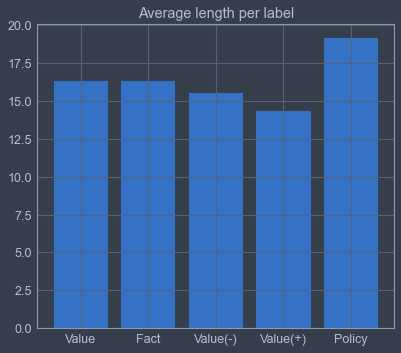

In [7]:
corpus = [words.split() for words in ADUs["tokens"]]
lengths = [len(c.split()) for c in corpus_lemmatized]
avgs = []

dfl = pd.DataFrame({"len": lengths, "label": ADUs["label"]})
for label in ADUs["label"].unique():
    lens = dfl.loc[dfl["label"] == label]
    avgs.append(lens["len"].mean())

plt.bar(ADUs["label"].unique(),avgs)
plt.title("Average length per label")
plt.savefig("./statistics/label_len.png")

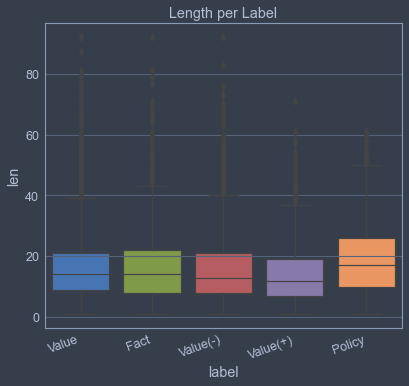

In [17]:
ax = sb.boxplot(x='label', y='len', data=dfl)
ax.set(title = "Length per Label")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')

fig = ax.get_figure()
fig.savefig("./statistics/text_length.png") 